In [1]:
FILE_PATH ="cervical-cancer_part_1.csv"
DF_EXPORT_MODEL ="cervical-cancer_model.pkl"

### load libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import pickle
import warnings
warnings.filterwarnings("ignore")

### Read the data

In [3]:
df =pd.read_csv(FILE_PATH)

### show five rows

In [4]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Dx:Cancer
0,0,-1.064408,0.864230,-7.176970e-01,-0.896455,-0.419483,-0.302993,-0.206583,-1.367694,-0.607375,...,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949,0
1,1,-1.418269,-0.926119,-1.072899e+00,-0.896455,-0.419483,-0.302993,-0.206583,-1.367694,-0.607375,...,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949,0
2,2,0.822850,-0.926119,-4.119088e-16,-0.896455,-0.419483,-0.302993,-0.206583,-1.367694,-0.607375,...,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949,0
3,3,2.946016,1.461013,-3.624949e-01,1.165568,2.383889,8.638075,16.202125,0.731157,0.183850,...,-0.052235,-0.293385,-0.104383,6.737128,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949,1
4,4,2.238294,0.267447,1.413516e+00,1.165568,-0.419483,-0.302993,-0.206583,0.731157,3.348752,...,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949,0


### Remove column name Unnamed

In [5]:
df=df.drop(['Unnamed: 0'],axis =1)

### split data

In [6]:
X =df.drop(["Dx:Cancer"],axis =1)
y =df["Dx:Cancer"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state=42)

In [10]:
X_train.shape

(584, 33)

### Buliding model clasification first base model LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)  # training data

LogisticRegression()

### apply score on model

In [28]:
model.score(X_test, y_test)  

0.9920318725099602

#### apply predict on test data

In [29]:
prediction =model.predict(X_test)

### calculate Accuracy score

In [30]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9920318725099602


### calculate confusion_matrix

In [31]:
cm = confusion_matrix(y_test, prediction)

### Show confusion_matrix

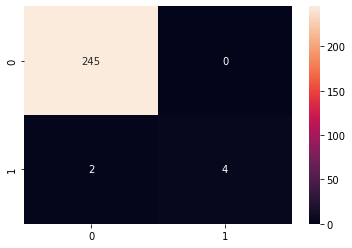

In [32]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); #annot=True to annotate cells, ftm='g' to disable scientific notation


### calculate Classification_Report

In [33]:
Classification_Report =classification_report(y_test, prediction)
print(Classification_Report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       245
           1       1.00      0.67      0.80         6

    accuracy                           0.99       251
   macro avg       1.00      0.83      0.90       251
weighted avg       0.99      0.99      0.99       251



### save the model to disk

In [46]:
pickle.dump(model, open(DF_EXPORT_MODEL, 'wb'))
 